In [804]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [805]:
train = "//home//vinicius//Data_Science//Notebooks//Kaggle//DataSets//titanic//train.csv"
test = "//home//vinicius//Data_Science//Notebooks//Kaggle//DataSets//titanic//test.csv"

In [806]:
df1 = pd.read_csv(train)
df2 = pd.read_csv(test)

In [807]:
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [808]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Train DataSet
#### Total of rows: 891
#### Total of Columns: 12

In [809]:
df2.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [810]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Test DataSet
#### Total Rows: 418
#### Total Columns: 11

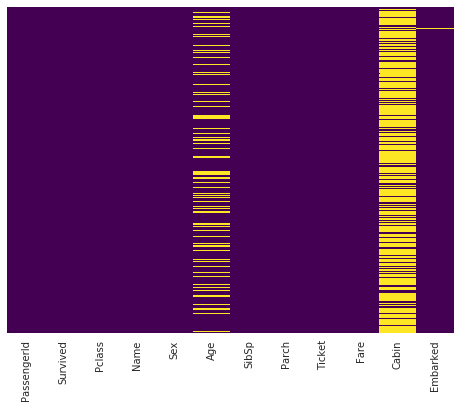

In [811]:
## Checking NULL values
plt.figure(figsize=(8,6))
sns.heatmap(df1.isnull(), yticklabels=False, cbar=False, cmap='viridis') 

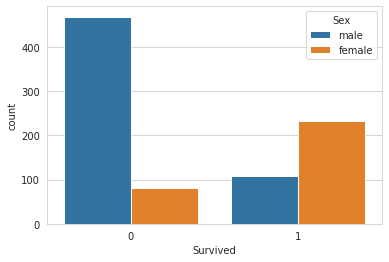

In [812]:
## Analysis by sex
sns.countplot(x='Survived', hue='Sex', data=df1)

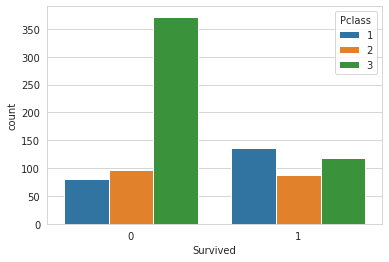

In [813]:
## Analysis by class
sns.countplot(x='Survived', hue='Pclass',data=df1)
## Economic class was the one who most died

In [814]:
## what means cabin letter? If your cabin is deep your chance to die increase?

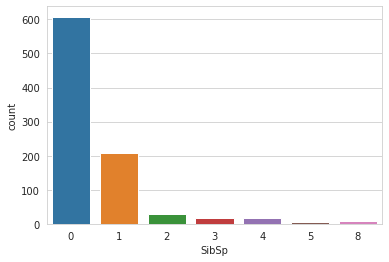

In [815]:
sns.countplot(x='SibSp', data = df1)

# Dealing with missing values

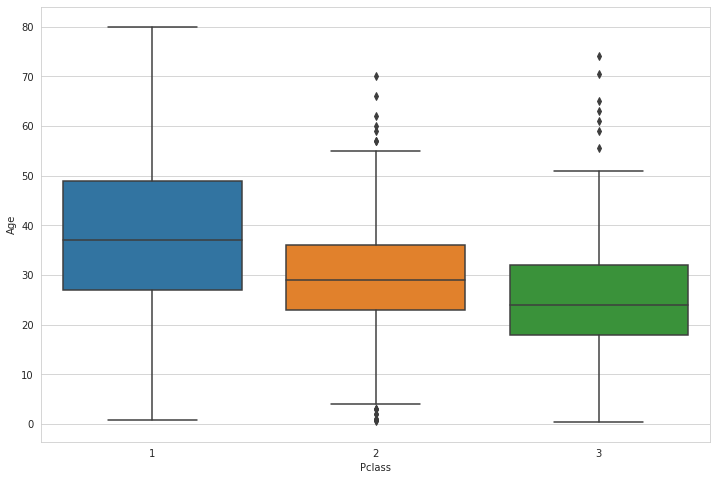

In [816]:
## Checking Age/Class (what do with missing values on age?)
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age', data=df1)

**Better class, older person mean**  
**Fill missing values on age with class mean** 

In [817]:
print("Age Mean Class 1: ", df1[df1['Pclass']==1]['Age'].mean())
print("Age Mean Class 2: ", df1[df1['Pclass']==2]['Age'].mean())
print("Age Mean Class 3: ", df1[df1['Pclass']==3]['Age'].mean())

Age Mean Class 1:  38.233440860215055
Age Mean Class 2:  29.87763005780347
Age Mean Class 3:  25.14061971830986


In [818]:
def fill_ages(data):
    age = data[0]
    pclass = data[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        elif pclass==3:
            return 25
    else:
        return age

In [819]:
df1['Age'] = df1[['Age', 'Pclass']].apply(fill_ages,axis=1)
df2['Age'] = df2[['Age', 'Pclass']].apply(fill_ages,axis=1)

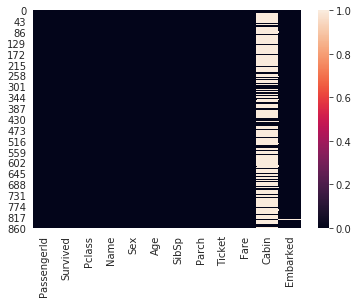

In [820]:
plt.figure(figsize=(6,4))
sns.heatmap(df1.isnull())

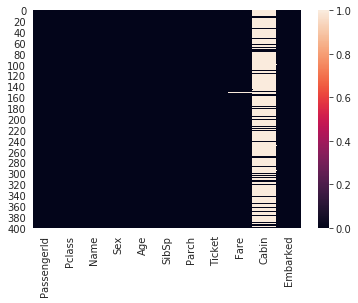

In [821]:
plt.figure(figsize=(6,4))
sns.heatmap(df2.isnull())

In [822]:
df1['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [823]:
train_test = [df1, df2]

for dataset in train_test:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [824]:
df1['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Ms            1
Don           1
Lady          1
Capt          1
Mme           1
Jonkheer      1
Countess      1
Name: Title, dtype: int64

## Title Map
**Mr=0  
Miss=1  
Mrs=2  
Others=3**

In [825]:
df2[df2['Title'].isnull()] = df2.replace(np.nan,'Miss')

In [826]:
df2[df2['Title'].isnull()]['Title']

Series([], Name: Title, dtype: object)

In [827]:
title_map = {'Mr':0, 'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Major':3,'Col':3,'Mlle':3,'Sir':3,'Ms':3,'Don':3,
             'Lady':3,'Capt':3,'Mme':3,'Jonkheer':3,'Countess':3}

In [828]:
for dataset in train_test:
    dataset['Title']= dataset['Title'].map(title_map)

In [829]:
df2[df2['Title'].isnull()] = df2.replace(np.nan,1)

In [830]:
df1['Title'].value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

In [831]:
df2['Title'].value_counts()

0.0    240
1.0     79
2.0     72
3.0     27
Name: Title, dtype: int64

**Analysis by Title**

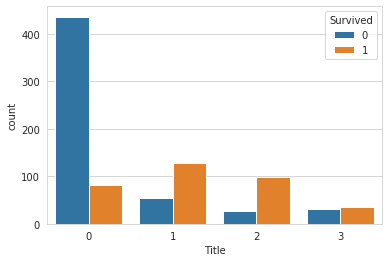

In [832]:
sns.countplot(x='Title',hue='Survived',data=df1)

**Mr died more than rest**  
**Miss and Mrs more chance to live**

## Gender Map
**Male=1  
Female=0**

In [833]:
## Train DataSet 
sex = pd.get_dummies(df1['Sex'],drop_first=True)
df1['Sex']=sex

In [834]:
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  Title  
0         A/5 21171   7.2500   NaN        S      0  
1          PC 17599  71.2833   C85        C      2  
2  STON/O2. 3101282   7.9250   NaN        S      1  
3            113803  53.1000  C123        S      2  
4            373450   8.0500   NaN        S      0

In [835]:
## Test Data Set
sex = pd.get_dummies(df2['Sex'],drop_first=True)
df2['Sex']=sex

In [836]:
df2.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    1   
3          895       3                              Wirz, Mr. Albert    1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Title  
0  34.5      0      0   330911   7.8292   NaN        Q    0.0  
1  47.0      1      0   363272        7   NaN        S    2.0  
2  62.0      0      0   240276   9.6875   NaN        Q    0.0  
3  27.0      0      0   315154   8.6625   NaN        S    0.0  
4  22.0      1      1  3101298  12.2875   NaN        S    2.0

## Age Mapping
**age<=16=0  
16<age<=26=1  
26<age<=36=2  
36<age<=62=3  
age>62 = 4**

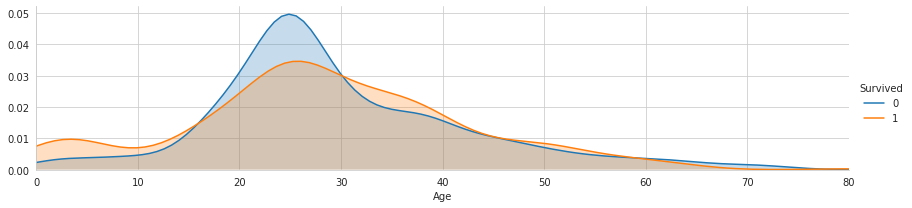

In [837]:
facet = sns.FacetGrid(df1,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,df1['Age'].max()))
facet.add_legend()

In [838]:
for dataset in train_test:
    dataset.loc[dataset['Age']<=16,'Age']=0,
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),'Age']=1,
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),'Age']=2,
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),'Age']=3,
    dataset.loc[dataset['Age']>62, 'Age']=4

In [839]:
df1

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  1.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  3.0      1   
2                               Heikkinen, Miss. Laina    0  1.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  2.0      1   
4                             Allen, Mr. William Henry    1  2.0      0   
..                                                 ...  ...  ...    ...   
886                              Montvila, Rev. Juozas    1  2.0      0   
887                       Graham, Miss. Margaret Edith    0  1.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0  1.0      1   
889                              Behr, Mr. Karl Howell    1  1.0      0   
890                                Dooley, Mr. Patrick    1  2.0      0   

     Parch            Ticket     Fare Cabin Embarked  Title  
0        0         A/5 21171   7.2500   NaN        S      0  
1        0          PC 17599  71.2833   C85        C      2  
2        0  STON/O2. 3101282   7.9250   NaN        S      1  
3        0            113803  53.1000  C123        S      2  
4        0            373450   8.0500   NaN        S      0  
..     ...               ...      ...   ...      ...    ...  
886      0            211536  13.0000   NaN        S      3  
887      0            112053  30.0000   B42        S      1  
888      2        W./C. 6607  23.4500   NaN        S      1  
889      0            111369  30.0000  C148        C      0  
890      0            370376   7.7500   NaN        Q      0  

[891 rows x 13 columns]

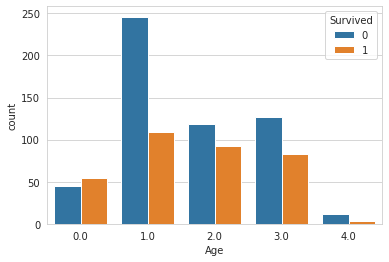

In [840]:
sns.countplot(x='Age', hue='Survived',data=df1)

**16<AGE<26 biggest dead rate**

In [841]:
Pclass1 = df1[df1['Pclass']==1]['Embarked'].value_counts() ## Class 1 embarked values
Pclass2 = df1[df1['Pclass']==2]['Embarked'].value_counts() ## CLass 2 embarked values
Pclass3 = df1[df1['Pclass']==3]['Embarked'].value_counts() ## Class 3 embarked values

df3 = pd.DataFrame([Pclass1,Pclass2,Pclass3],index=['1 class','2 Class', '3 Class'])
df3.head()

S   C   Q
1 class  127  85   2
2 Class  164  17   3
3 Class  353  66  72

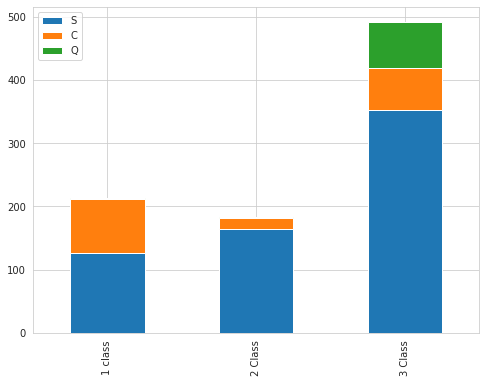

In [842]:
df3.plot(kind='bar',stacked=True,figsize=(8,6))

**Most passangers embarked on S**  
**Passangers from Q are just on 3 class**

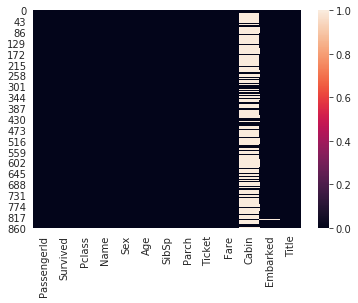

In [843]:
sns.heatmap(df1.isnull())

In [844]:
df1[df1.Embarked.isnull()] ##Pclass = 1, add to S because S has the most shipments

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex  Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Title  
61     0  3.0      0      0  113572  80.0   B28      NaN      1  
829    0  3.0      0      0  113572  80.0   B28      NaN      2

In [845]:
df1[df1.Embarked.isnull()] = df1.replace(np.nan, 'S') ## Replace NaN to 'S'
df2[df2.Embarked.isnull()] = df2.replace(np.nan, 'S') 

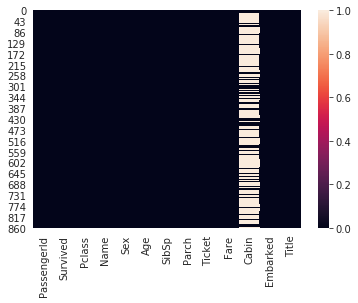

In [846]:
sns.heatmap(df1.isnull())

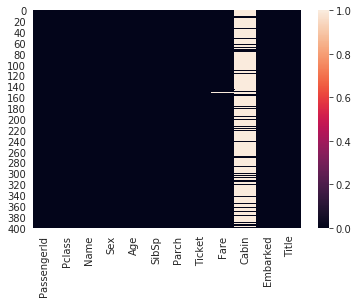

In [847]:
sns.heatmap(df2.isnull())

## No more NaN values on Embarked 
## Now clean the NaN value on df2 to Fare

In [848]:
df2.loc[df2['Fare'].isnull()] ## Passanger Class = 3
## Lets take the mean value of fare for pclass = 3 and age = 3

PassengerId  Pclass                Name  Sex  Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas    1  3.0      0      0   3701   

    Fare Cabin Embarked  Title  
152  NaN   NaN        S    0.0

In [849]:
df2[(df2.Pclass==3) & (df2.Age==3)]['Fare'].mean()

13.751043749999997

In [850]:
df2.loc[df2['Fare'].isnull(), 'Fare']=13.75 ## Replace NaN to 13.75

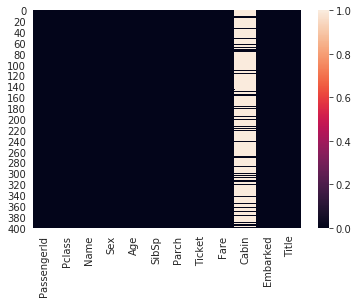

In [851]:
sns.heatmap(df2.isnull())

# Now we have NaN values only on "Cabin"

## Embarked Mapping  
### S = 0
###  C = 1
### Q = 2

In [852]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping) ## Apply embarked mapping on datasets

In [853]:
df1.Embarked.value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

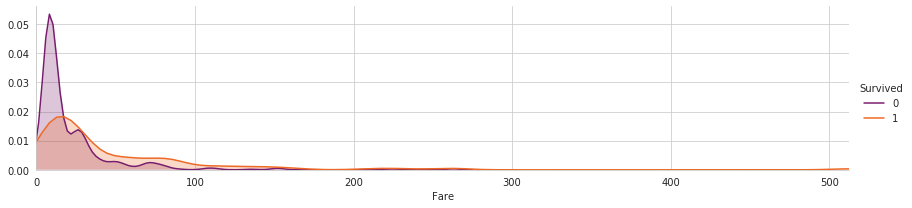

In [854]:
facet = sns.FacetGrid(df1,hue='Survived',aspect=4,palette='inferno')
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,df1['Fare'].max()))
facet.add_legend()

## Fare Mapping
**Fare <17 = 0  
17<Fare<=30 = 1  
30<Fare<=100 = 2  
Fare > 100 = 3**

In [855]:
## Divides Fare in categories
for dataset in train_test:
    dataset.loc[dataset['Fare']<=17,'Fare']=0,
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30),'Fare']=1,
    dataset.loc[(dataset['Fare']>30) & (dataset['Fare']<=100),'Fare']=2,
    dataset.loc[dataset['Fare']>100, 'Fare']=3

In [856]:
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  3.0      1      0   
2                             Heikkinen, Miss. Laina    0  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  2.0      1      0   
4                           Allen, Mr. William Henry    1  2.0      0      0   

             Ticket  Fare Cabin  Embarked  Title  
0         A/5 21171   0.0   NaN         0      0  
1          PC 17599   2.0   C85         1      2  
2  STON/O2. 3101282   0.0   NaN         0      1  
3            113803   2.0  C123         0      2  
4            373450   0.0   NaN         0      0

In [857]:
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [858]:
df1['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [859]:
Pclass1 = df1[df1['Pclass']==1]['Cabin'].value_counts() ## Class 1 cabin values
Pclass2 = df1[df1['Pclass']==2]['Cabin'].value_counts() ## CLass 2 cabin values
Pclass3 = df1[df1['Pclass']==3]['Cabin'].value_counts() ## Class 3 cabin values

In [860]:
df4 = pd.DataFrame([Pclass1,Pclass2, Pclass3], index=['1 Class','2 Class','3 Class'])

In [861]:
df4.head()

C     B     D     E     A    T    F    G
1 Class  59.0  47.0  29.0  25.0  15.0  1.0  NaN  NaN
2 Class   NaN   NaN   4.0   4.0   NaN  NaN  8.0  NaN
3 Class   NaN   NaN   NaN   3.0   NaN  NaN  5.0  4.0

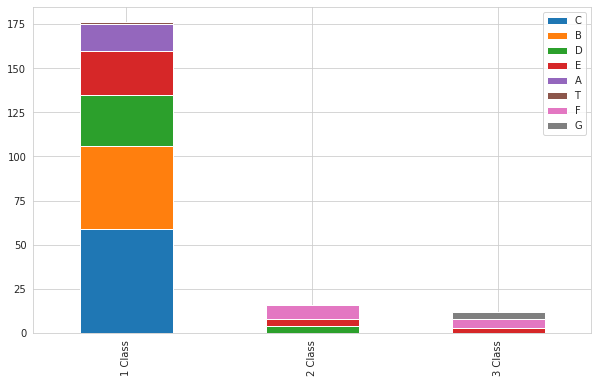

In [862]:
df4.plot(kind='bar',stacked=True,figsize=(10,6))

## First Class Cabins:
**A,B,C,D,E**
## Second Class Cabins:
**D, E, F**
## Third Class Cabins
**E, F, G**

In [863]:
## Use or not Cabin values? to many NaN values
## Will replace by Pclass Cabin mean but maybe have to delete all column

In [864]:
cabin_mapping = {'A':0, 'B':0.4, 'C': 0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8} ##Feature Scaling values

In [865]:
for dataset in train_test:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [866]:
## Fill Null Values with mean of class
train_cabin = df1['Cabin'].fillna(df1.groupby('Pclass')['Cabin'].transform('median'))
test_cabin = df2['Cabin'].fillna(df2.groupby('Pclass')['Cabin'].transform('median'))

In [867]:
df1['Cabin'] = train_cabin
df2['Cabin'] = test_cabin

In [868]:
print(df1['Cabin'].isnull().sum())
print(df2['Cabin'].isnull().sum())

0
0


## Family Size

In [869]:
df1['Family Size'] = df1['SibSp']+df1['Parch']+1 ## Family + Self
df2['Family Size'] = df2['SibSp']+df2['Parch']+1

In [870]:
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  3.0      1      0   
2                             Heikkinen, Miss. Laina    0  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  2.0      1      0   
4                           Allen, Mr. William Henry    1  2.0      0      0   

             Ticket  Fare  Cabin  Embarked  Title  Family Size  
0         A/5 21171   0.0    2.0         0      0            2  
1          PC 17599   2.0    0.8         1      2            2  
2  STON/O2. 3101282   0.0    2.0         0      1            1  
3            113803   2.0    0.8         0      2            2  
4            373450   0.0    2.0         0      0            1

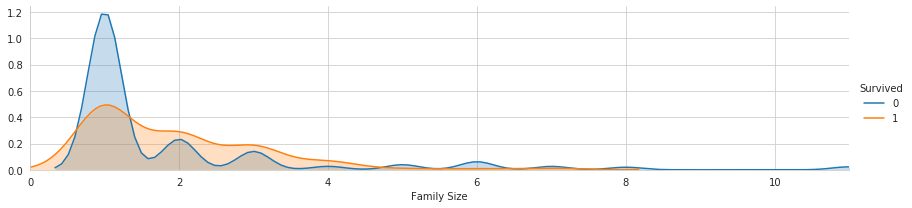

In [871]:
facet = sns.FacetGrid(df1,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Family Size',shade=True)
facet.set(xlim=(0,df1['Family Size'].max()))
facet.add_legend()

## Family Mapping

In [872]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2.0, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}

In [873]:
for dataset in train_test:
    dataset['Family Size'] = dataset['Family Size'].map(family_mapping)

In [874]:
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  3.0      1      0   
2                             Heikkinen, Miss. Laina    0  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  2.0      1      0   
4                           Allen, Mr. William Henry    1  2.0      0      0   

             Ticket  Fare  Cabin  Embarked  Title  Family Size  
0         A/5 21171   0.0    2.0         0      0          0.4  
1          PC 17599   2.0    0.8         1      2          0.4  
2  STON/O2. 3101282   0.0    2.0         0      1          0.0  
3            113803   2.0    0.8         0      2          0.4  
4            373450   0.0    2.0         0      0          0.0

## Create Train Data and Target

In [875]:
df1.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  1.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  3.0      1      0   
2                             Heikkinen, Miss. Laina    0  1.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  2.0      1      0   
4                           Allen, Mr. William Henry    1  2.0      0      0   

             Ticket  Fare  Cabin  Embarked  Title  Family Size  
0         A/5 21171   0.0    2.0         0      0          0.4  
1          PC 17599   2.0    0.8         1      2          0.4  
2  STON/O2. 3101282   0.0    2.0         0      1          0.0  
3            113803   2.0    0.8         0      2          0.4  
4            373450   0.0    2.0         0      0          0.0

In [876]:
#Train Data
features_drop = ['Name','PassengerId','Ticket','SibSp', 'Parch', 'Survived']
train_data = df1.drop(features_drop, axis=1)

In [877]:
train_data.head(10)

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  Family Size
0       3    1  1.0   0.0    2.0         0      0          0.4
1       1    0  3.0   2.0    0.8         1      2          0.4
2       3    0  1.0   0.0    2.0         0      1          0.0
3       1    0  2.0   2.0    0.8         0      2          0.4
4       3    1  2.0   0.0    2.0         0      0          0.0
5       3    1  1.0   0.0    2.0         2      0          0.0
6       1    1  3.0   2.0    1.6         0      0          0.0
7       3    1  0.0   1.0    2.0         0      3          1.6
8       3    0  2.0   0.0    2.0         0      2          0.8
9       2    0  0.0   2.0    1.8         1      2          0.4

In [878]:
# Test Data
features_drop = ['PassengerId', 'Name', 'SibSp','Parch','Ticket']
test_data = df2.drop(features_drop, axis=1)
test_data.head()

Pclass  Sex  Age  Fare  Cabin  Embarked  Title  Family Size
0       3    1  2.0     0    2.0         2    0.0          0.0
1       3    0  3.0     0    2.0         0    2.0          0.4
2       2    1  3.0     0    2.0         2    0.0          0.0
3       3    1  2.0     0    2.0         0    0.0          0.0
4       3    0  1.0     0    2.0         0    2.0          0.8

In [880]:
test_data.Title

0      0.0
1      2.0
2      0.0
3      0.0
4      2.0
      ... 
413    0.0
414    1.0
415    0.0
416    0.0
417    3.0
Name: Title, Length: 418, dtype: float64

In [881]:
target = df1.Survived

In [882]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Modelling

In [883]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## Cross Validation (K-fold)

In [884]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [885]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### KNN

In [886]:
clf = KNeighborsClassifier(n_neighbors=12)

In [887]:
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)

[0.78888889 0.78651685 0.83146067 0.84269663 0.87640449 0.83146067
 0.83146067 0.80898876 0.79775281 0.83146067]


In [888]:
## KNN score
round(np.mean(score)*100, 2)

82.27

### Logistic Regression

In [899]:
x_train, x_test, y_train, y_test = train_test_split(train_data,df1['Survived'], test_size=0.3)

In [889]:
logmodel = LogisticRegression()

In [900]:
logmodel.fit(x_train,y_train)

/home/vinicius/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [901]:
predictions = logmodel.predict(x_test)

In [902]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       174
           1       0.80      0.74      0.77        94

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



# Testing

In [912]:
## Ver como usar no Logistic model os modelos de treino e teste que criei